In [74]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Load Data

In [75]:
# Importing the dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(5000, 2)


,V1,V2
0,4.53320,6.06542
1,5.20651,5.94591
2,5.16664,6.60290
3,5.70023,5.70741
4,5.24035,5.18443


In [76]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

for key in data.keys():
    print(key)

V1
V2


In [77]:
X = np.array(list(zip(f1, f2)))
X

array([[4.5332 , 6.06542],
       [5.20651, 5.94591],
       [5.16664, 6.6029 ],
       ...,
       [3.51482, 3.34662],
       [3.41057, 3.41338],
       [3.74464, 2.84441]], shape=(5000, 2))

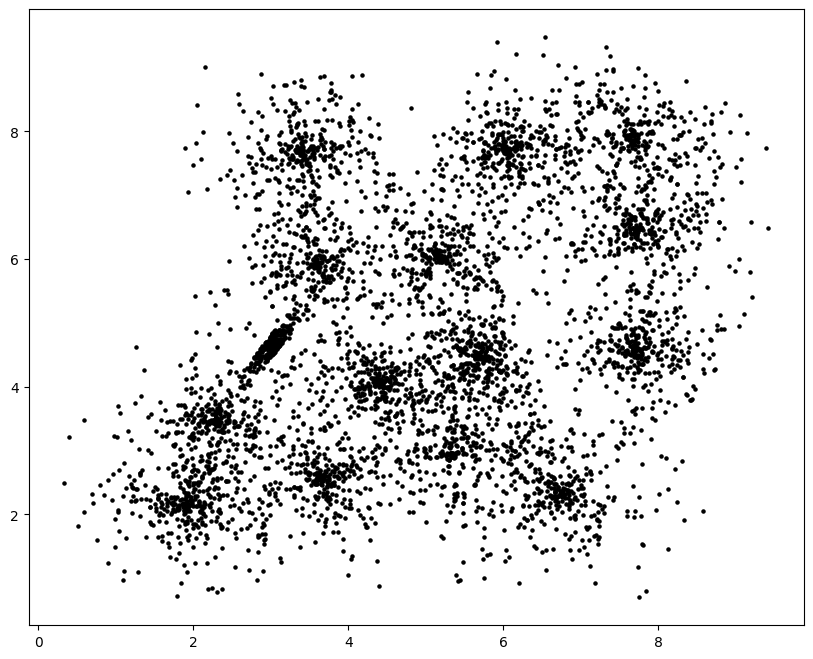

In [78]:
plt.scatter(f1, f2, c='black', s=5)

### 1.1 Define Euclidean Distances function

In [79]:
def euclidean_distances(x, y,ax=1):
    """Calculate the Euclidean distances between corresponding points in two arrays."""
    if x.shape != y.shape:
        raise ValueError("Both arrays must have the same shape")
    
    # Calculate squared differences and sum them
    squared_diffs = np.sum((x - y) ** 2, axis=ax)
    
    # Take the square root of the sum
    distances = np.sqrt(squared_diffs)
    
    return distances

###  Resourse for [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [80]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [81]:
# Example usage
x  = np.array([[2.121, 3.1213],[3.2323, 4.2131],[4.2231, 6.32]])
y  = np.array([[5.121, 1.1213],[7.2323, 9.2131],[3.2331, 1.32]])

a = euclidean_distances(x, y)
b = dist(x, y)
print("Euclidean Distance:", a)
print('c',b)

Euclidean Distance: [3.60555128 6.40312424 5.09706778]
c [3.60555128 6.40312424 5.09706778]


## 2. Initialize clusters

In [82]:
# Number of clusters
k = 6
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-2, size=k)
print(C_x, C_y)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[6 1 2 5 0 1] [4 1 1 4 2 3]
[[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]]


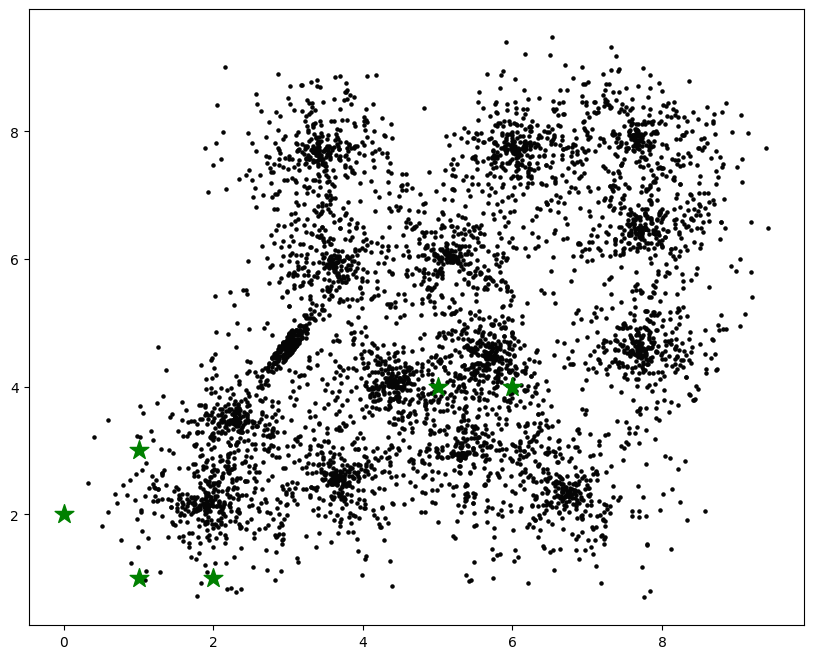

In [83]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=5)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [84]:
for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    print(X[i],C,cluster)

[4.5332  6.06542] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.20651 5.94591] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.16664 6.6029 ] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.70023 5.70741] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 0
[5.24035 5.18443] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.44957 5.05968] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.03105 5.77815] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.15747 6.01704] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.88509 6.66153] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 0
[5.33602 5.84471] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[4.88815 7.36618] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.55436 6.48459] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 0
[5.25149 5.98859] [[6. 4.]
 [1. 1.]
 [2. 1.]
 [5. 4.]
 [0. 2.]
 [1. 3.]] 3
[5.27235 5.97804] [[6. 4.

### 2.1 Updates the centroids

In [85]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
              
#         print(distances,clusters[i])
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


10.677078252031311


In [ ]:
C, C_old

(array([[6.73973  , 4.675855 ],
        [3.7260554, 4.4200797],
        [2.5318363, 2.6233785],
        [3.95639  , 6.8472805],
        [7.168952 , 7.4040165],
        [6.075693 , 2.6543527]], dtype=float32),
 array([[6.73973  , 4.675855 ],
        [3.7260554, 4.4200797],
        [2.5318363, 2.6233785],
        [3.95639  , 6.8472805],
        [7.168952 , 7.4040165],
        [6.075693 , 2.6543527]], dtype=float32))

### 2.2 Plot updated results

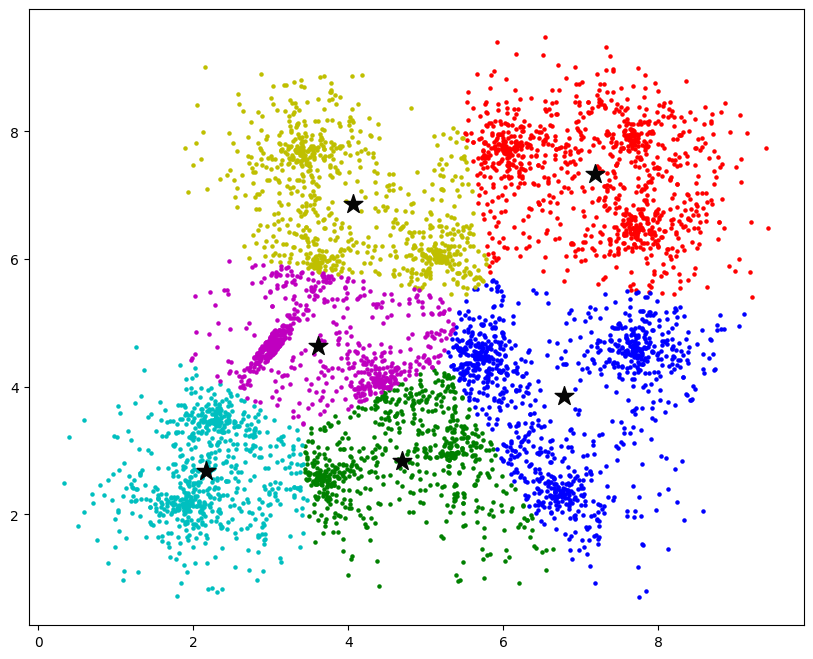

In [86]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## 3. The scikit-learn approach

In [87]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=6)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

### Try to review X, labels and centroids by print

In [88]:
X

array([[4.5332 , 6.06542],
       [5.20651, 5.94591],
       [5.16664, 6.6029 ],
       ...,
       [3.51482, 3.34662],
       [3.41057, 3.41338],
       [3.74464, 2.84441]], shape=(5000, 2))

In [90]:
labels

array([2, 2, 2, ..., 1, 1, 5], shape=(5000,), dtype=int32)

### Comparing with scikit-learn centroids

In [91]:
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[7.1861587 7.3273215]
 [4.696471  2.842206 ]
 [6.780657  3.8506372]
 [4.064794  6.8630104]
 [2.168327  2.6725705]
 [3.6091976 4.642424 ]]
[[6.07144322 2.67082584]
 [3.74330228 4.43030907]
 [3.95703244 6.85239752]
 [6.76981794 4.68276183]
 [7.16895209 7.40401634]
 [2.53307222 2.62536781]]


### Plot results - Please visualize the results and add your name to them

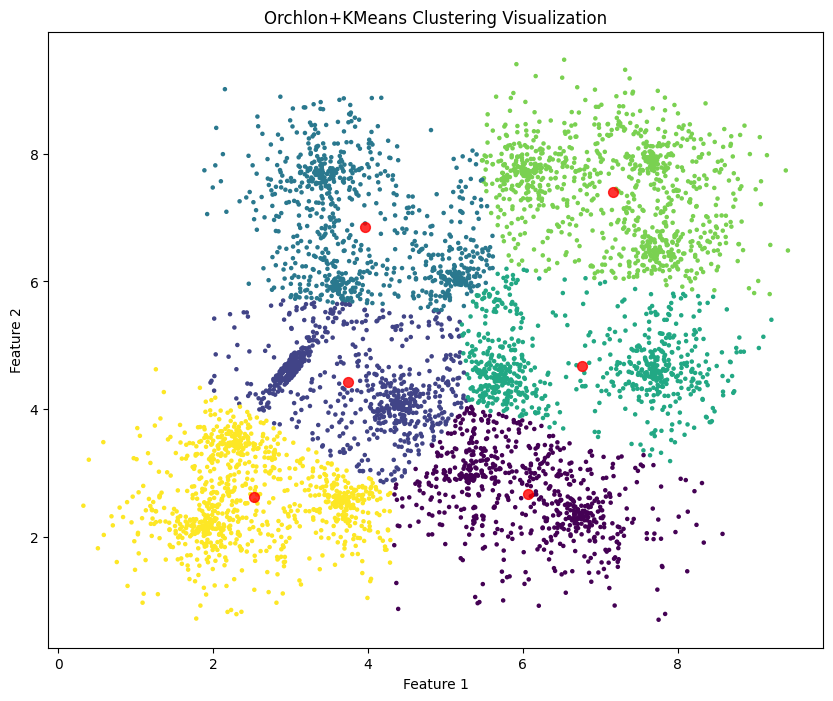

In [92]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)


plt.title('Orchlon+KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

You can see that the centroid values are equal, but in different order.

### 3.2 Another example

We will generate a new dataset using make_blobs function.

In [93]:
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (10, 8)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

### Try to review X, y

In [94]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

/var/folders/tp/hsjvvm555fxbfhgx00h95ymm0000gn/T/ipykernel_7192/1950825596.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=5, cmap='viridis')


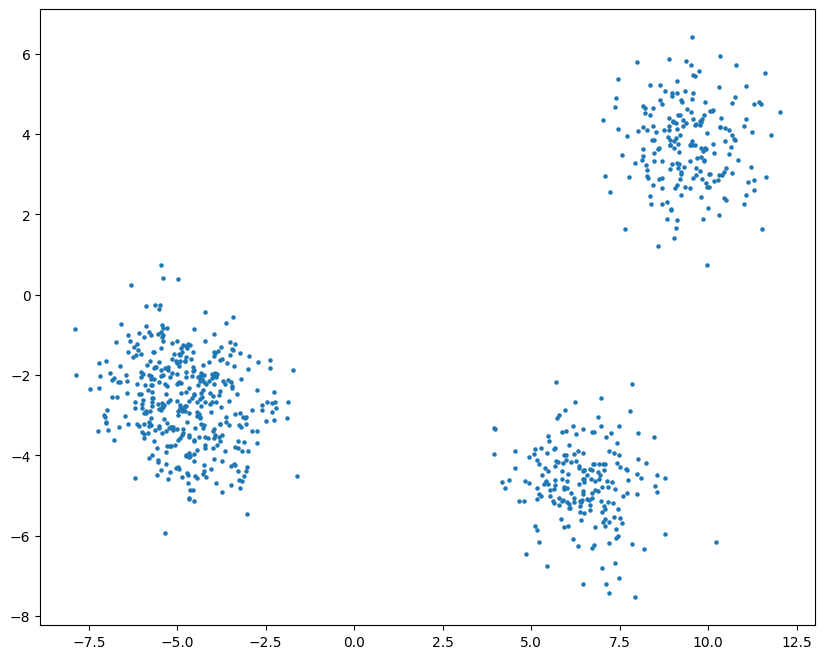

In [95]:
plt.scatter(X[:, 0], X[:, 1], s=5, cmap='viridis')

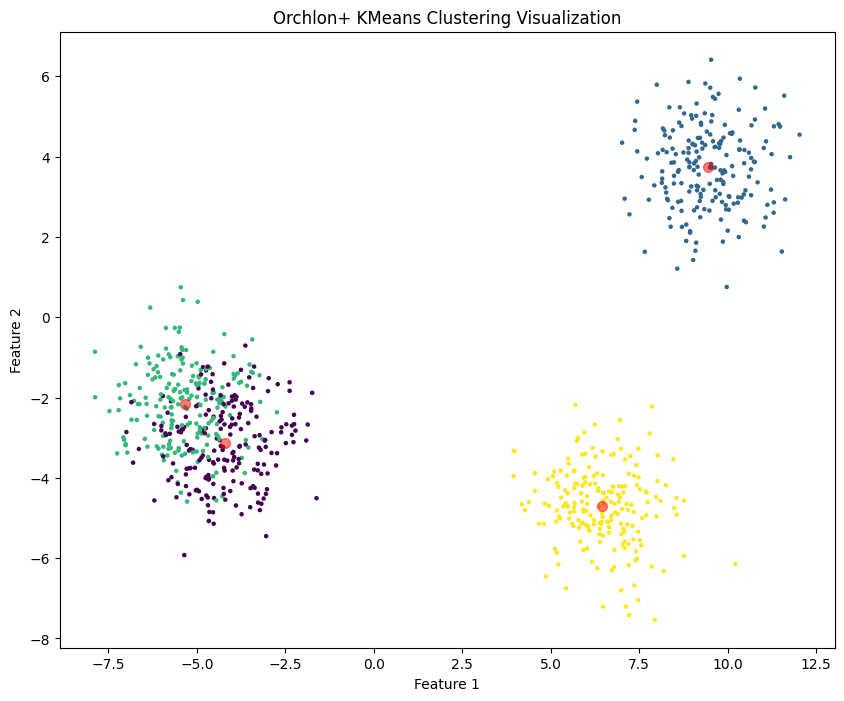

In [96]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)

plt.title('Orchlon+ KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 🎯 Practice Lab: K-Means Clustering

### 🧠 Objective
In this exercise, you will:
1. Generate a small synthetic dataset.  
2. Apply **K-Means clustering** to group similar data points.  
3. Visualize the clusters and centroids.  
4. Interpret how K-Means divides data based on similarity.

---

## 🧩 Scenario

You are given data representing **study hours** and **sleep hours** of several students.  
You need to cluster them into groups of **similar learning patterns**.

| Student | Study_Hours | Sleep_Hours |
|----------|--------------|-------------|
| A | 2 | 9 |
| B | 3 | 8 |
| C | 4 | 7 |
| D | 6 | 6 |
| E | 7 | 5 |
| F | 8 | 5 |
| G | 9 | 4 |

Your task: Use **K-Means** to group these students into **two clusters**:
- Cluster 1 → “High study, low sleep”  
- Cluster 2 → “Low study, high sleep”

---

## 🧠 Task Requirements

1. Create the dataset as a pandas DataFrame.  
2. Use **scikit-learn’s KMeans** to find clusters (k=2).  
3. Add the predicted cluster labels to the DataFrame.  
4. Plot the data points with color-coded clusters and centroids.  
5. Interpret which students belong to which group.

---



In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
data = {
    'Student': ['A','B','C','D','E','F','G'],
    'Study_Hours': [2,3,4,6,7,8,9],
    'Sleep_Hours': [9,8,7,6,5,5,4]
}


In [149]:
data = pd.DataFrame(data)
# Fit on the numeric columns only (Study_Hours and Sleep_Hours)
X_data = data[['Study_Hours', 'Sleep_Hours']].values

kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X_data)
labels = kmeans.predict(X_data)
C = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels
print(data)

  Student  Study_Hours  Sleep_Hours  Cluster
0       A            2            9        0
1       B            3            8        0
2       C            4            7        0
3       D            6            6        1
4       E            7            5        1
5       F            8            5        1
6       G            9            4        1


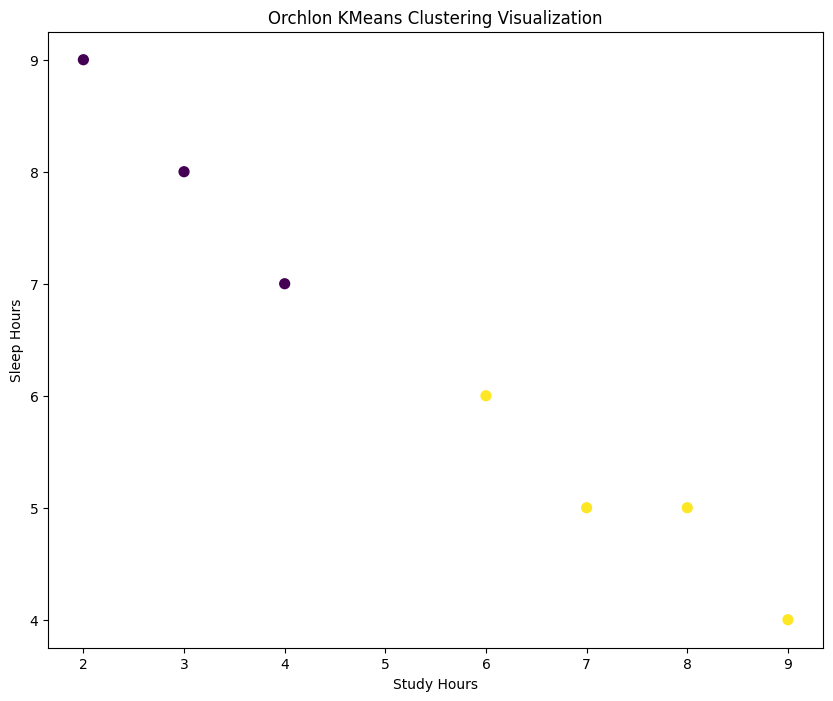

In [ ]:
plt.scatter(data['Study_Hours'], data['Sleep_Hours'], c=labels, s=50, cmap='viridis')

plt.title('Orchlon KMeans Clustering Visualization')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.show()

## Visualizing the graph with the cluster center

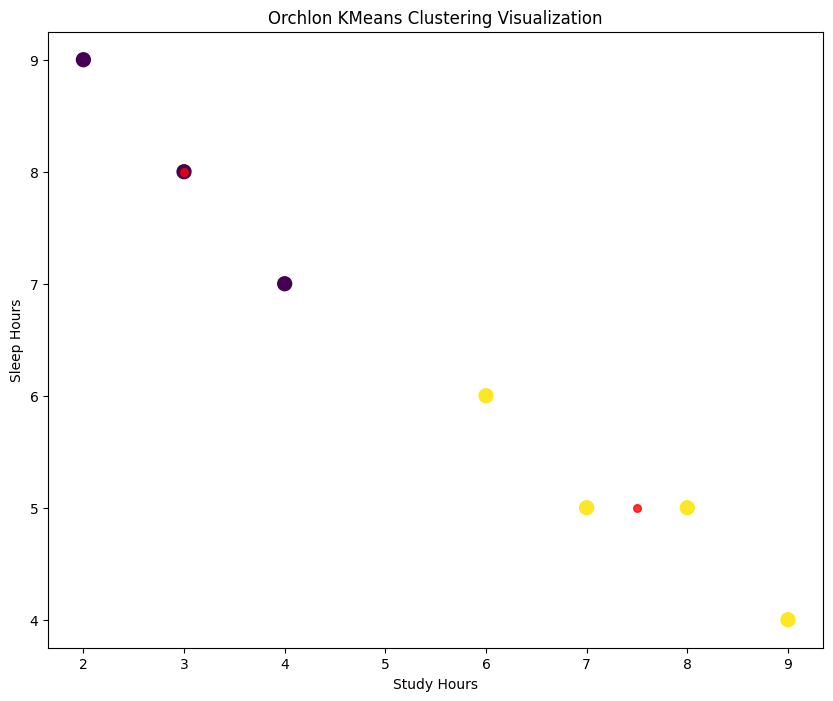

In [153]:
plt.scatter(data['Study_Hours'], data['Sleep_Hours'], c=labels, s=100, cmap='viridis')

# Show the cluster center
plt.scatter(C[:, 0], C[:, 1], c='red', s=30, alpha=0.8)

plt.title('Orchlon KMeans Clustering Visualization')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.show()

## 5. Interpretation

Let's analyze which students belong to which cluster and interpret the results.


In [157]:
# Display students grouped by cluster
print("Cluster 0")
print(data[data['Cluster'] == 0][['Student', 'Study_Hours', 'Sleep_Hours']].to_string(index=False))

print("\nCluster 1")
print(data[data['Cluster'] == 1][['Student', 'Study_Hours', 'Sleep_Hours']].to_string(index=False))

print("\nCluster Centers")
print(f"Cluster 0 Center: Study = {C[0][0]:.2f} hours, Sleep = {C[0][1]:.2f} hours")
print(f"Cluster 1 Center: Study = {C[1][0]:.2f} hours, Sleep = {C[1][1]:.2f} hours")


Cluster 0
Student  Study_Hours  Sleep_Hours
      A            2            9
      B            3            8
      C            4            7

Cluster 1
Student  Study_Hours  Sleep_Hours
      D            6            6
      E            7            5
      F            8            5
      G            9            4

Cluster Centers
Cluster 0 Center: Study = 3.00 hours, Sleep = 8.00 hours
Cluster 1 Center: Study = 7.50 hours, Sleep = 5.00 hours


**Interpretation:**

The K-Means clustering has successfully separated the students into two groups:

1. **Cluster 0** - Students with **low study hours and high sleep hours** (less intensive study pattern)
2. **Cluster 1** - Students with **high study hours and low sleep hours** (more intensive study pattern)

This demonstrates how K-Means identifies natural groupings in the data based on similarity in both study and sleep patterns.
